# pH Calibration Factors
Includes:

- pH calibration factors for the pH probe
- pH calculation formulas, including temperature compensation
- pH probe calibration procedures
- brief description of the calibration procedures
- a formula to compute the calibration slope and intercept values using basic Python, with a function to verify pH calculations (to have a second verification of the C++ code)

## pH Slope, Intercept, and Approximation Calculation

$$ \begin{align}
slope &= \frac{\frac{(7.0 - 4.01)}{(neutralVoltage - acidVoltage)} + \frac{(7 - 10.0)}{(neutralVoltage - baseVoltage)}}{2} \\
intercept &= 7.0 - slope * (neutralVoltage) \\
compensatedSlope &= slope * \frac{(temperature + 273.15)}{(25.0 + 273.15)} \\
pHValue &= compensatedSlope * voltage + intercept
\end{align} $$

Where:

- slope = initial pH slope calculated using known pH values and the respective voltages as measured by the pH sensor,
- interceptPH = the intercept calculated using the neutral voltage as a reference point
- compensatedSlope = the slope adjusted for temperature variations
- pHValue = the calculated pH value





### Calibration Procedure

[1] Prepare pH probe by rinsing with De-Ionized or Battery Water, minimum (3) rinses, preferably (7).

[2] Calibrate pH probe using pH 4.0 or 4.01 buffer solution, minimum (2) times, using the calibration code.
- Note: This probe has a screw-on cap. I filled the cap, affixed it to the probe threads, and proceeded to measure.

[3] The calibration buffer will fill, wait until the 50 measurement threshold is reached, then use that value.

[4] Repeat [step 1] to cleanse the pH probe.

[5] Repeat [step 3] with pH 7.0 buffer solution, minimum (2) times.

[6] Repeat [step 1] to cleanse the pH probe.

[7] Repeat [step 3] with pH 10.0 buffer solution, minimum (2) times.

[8] Repeat [step 1] to cleanse the pH probe.

[9] Write the values into the code, assigning them to appropriate variables. Be sure to use the unmodified voltage registering on pin A0.

## Begin Caculation

In [10]:
#Define resistor offset (10k resistor between ADS1115 A0 pin and ground)
resistancemultiplier = 2

# Set voltages for pH 4.01, 7.00, and 10.01 buffers, as measured by the sensor

neutralVoltage = 784.12 * resistancemultiplier
acidVoltage = 1020.94 * resistancemultiplier
baseVoltage = 552.00 * resistancemultiplier

print("Let's confirm the values...")
print(f'Resistance multiplier: {resistancemultiplier}')
print(f'Neutral voltage: {neutralVoltage}')
print(f'Acid voltage: {acidVoltage}')
print(f'Base voltage: {baseVoltage}')

# degrees Celsius, for temperature compensation, specify the temperature at which
# the sensor is calibrated, or to calculate the pH at a different temperature
temperature = 25.0 

slope = ((7 - 4.01)/(neutralVoltage - acidVoltage)+(7-10)/(neutralVoltage - baseVoltage))/2

print(f'Slope: {slope}')

intercept = 7 - slope * neutralVoltage

print(f'Intercept: {intercept}')

compensatedslope = slope*((temperature+273.15)/(25+273.15))

print(f'Compensated slope: {compensatedslope}')

# The volts are in millivolts
def calculatepH(voltage):
    # Calculate pH value
    # Voltage must first be compensated with resistor offset
    phvalue = compensatedslope * voltage + intercept
    print("pH with voltage: ", voltage, " is: ", phvalue)
    return phvalue

Let's confirm the values...
Resistance multiplier: 2
Neutral voltage: 1568.24
Acid voltage: 2041.88
Base voltage: 1104.0
Slope: -0.006387493077579728
Intercept: 17.017122143983634
Compensated slope: -0.006387493077579728


In [11]:
calculatepH(1688)

pH with voltage:  1688  is:  6.235033829029053


6.235033829029053

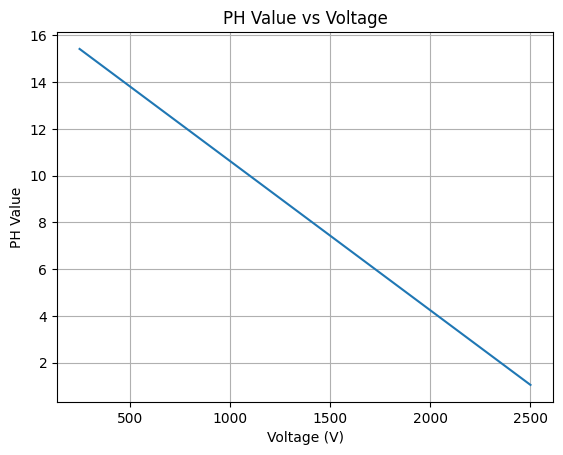

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -0.006387493077579728 * x + 17.017122143983634

plt.figure()
x = np.linspace(250, 2500, 100)
y = f(x)
plt.plot(x, y)
plt.xlabel('Voltage (V)')
plt.ylabel('PH Value')
plt.title('PH Value vs Voltage')
plt.grid()
plt.show()

## TDS EC, Slope, Intercept, and Approximation Calculation

### Calibration Procedure

[1] Prepare TDS probe by rinsing with De-Ionized or Battery Water, minimum (3) rinses, preferably (7).

[2] Calibrate TDS probe using 1413 μs/cm Conductivity Standard (or other appropriate value), minimum (2) times, using the calibration code.
- Note: This probe can only read up to 1000ppm, and 2.3V!

[3] The calibration buffer will fill, wait until the 50 measurement threshold is reached, then use that value.

[4] Repeat [step 1] to cleanse the TDS probe.

[5] Repeat [step 2] using De-Ionized water, max 10μs/cm.

[6] Repeat [step 1] to cleanse the TDS probe.

[7] Write the values into the code, assigning them to appropriate variables. Be sure to use the unmodified voltage registering on pin A0. However, if you find that using the raw voltage for DI water might be a better fit, since we want to avoid negative values and overfitting, you can use the unmodified voltage. I do not believe the resistor makes a huge impact for the lowest values, and the TDS function is non-linear.

- This probe is very unstable, and I have been unable to find a manufacturer's table on voltages. I have used the function to approximate the voltages.
- I have used the upper 1413 μs/cm to calculate the voltage multiplier.

# TDS Calibration Factors
Includes:

- TDS calibration factors for the TDS probe
- TDS calculation formulas, including temperature compensation
- TDS probe calibration procedures
- brief description of the calibration procedures
- a formula to compute the calibration slope and intercept values using basic Python, with a function to verify TDS calculations (to have a second verification of the C++ code)

In [13]:
# Define resistor offset (10k resistor between ADS1115 A0 pin and ground)
# EC function is non-linear, and we need to use a multiplier to get the correct value
# using this function: ECValue = (133.42 * voltage * voltage * voltage - 255.86 * voltage * voltage + 857.39 * voltage)
# if y = 1413 μs/cm, x = 1.73398 V
# if y = 10 μs/cm, x = 0.0117039 V
# adjust probe voltage to: voltage * resistancemultiplier, which is multiplier = 1.73398/(rawVoltage for 1413 μs/cm)
# Average probe voltage for 1413 μs/cm before multiplier: 0.499 to 0.550 V
# Average probe voltage for 10 μs/cm before multiplier: 0.014 to 0.012 V
resistancemultiplier = 3.33457692

# Set ppm values for conductivity standard and deionized water, as measured by the sensor

measuredConductivityStandard = 667.39
measuredDeionizedWater = 5.52476
kCoefficient = 0.019


print("Let's confirm the values...")
print(f'Resistance multiplier: {resistancemultiplier}')
print(f'Conductivity Standard: {measuredConductivityStandard}')
print(f'Deionized Water: {measuredDeionizedWater}')

# degrees Celsius, for temperature compensation, specify the temperature at which
# the sensor is calibrated, or to calculate the pH at a different temperature
temperature = 25.0 

slope = (706.5 - 5) / (measuredConductivityStandard - measuredDeionizedWater)

print(f'Slope: {slope}')

intercept = 0 - slope * measuredDeionizedWater

print(f'Intercept: {intercept}')

# The volts are standard Volts, temperature is in deg C
def ECValue(voltage,temperature):
    # Calculate EC value 
    ECValue = (133.42 * voltage * voltage * voltage - 255.86 * voltage * voltage + 857.39 * voltage)
    tempCorrection = 1.0 + kCoefficient * (temperature - 25.0)
    compensatedEC = ECValue / tempCorrection
    print("EC with voltage: ", voltage, " is: ", compensatedEC)
    return compensatedEC

def TdsValue(ECValue):
    # Calculate initial TDS value, computed from the compensated EC value
    rawTds = ECValue * 0.5
    # Apply the linear regression to correct the TDS value 
    correctedTds = slope * rawTds + intercept
    print("TDS with EC: ", ECValue, " is: ", correctedTds)
    return correctedTds

Let's confirm the values...
Resistance multiplier: 3.33457692
Conductivity Standard: 667.39
Deionized Water: 5.52476
Slope: 1.0598834288381727
Intercept: -5.855601572307982


In [14]:
TdsValue(ECValue(0.033,25))

EC with voltage:  0.033  is:  28.020033174540004
TDS with EC:  28.020033174540004  is:  8.993382846287421


8.993382846287421

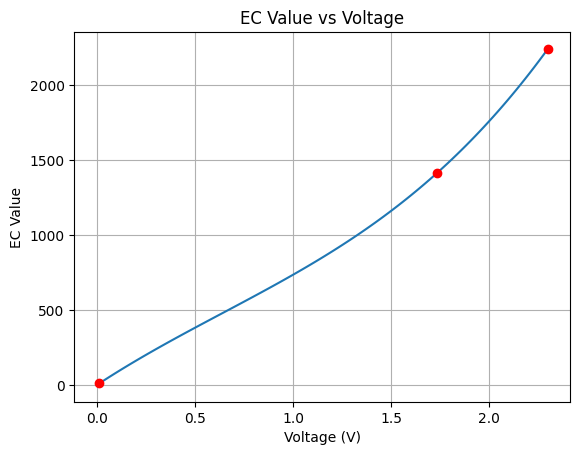

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 133.42 * x * x * x - 255.86 * x * x + 857.39 * x

def g(x):
    return 1.0598834288381727 * x -5.855601572307982

def h(x):
    return f(x) * 0.5

plt.figure()
x = np.linspace(0, 2.3, 100)
y = f(x)
plt.plot(x, y)
plt.plot(1.73398, 1413, 'ro')
plt.plot(0.0117039, 10, 'ro')
plt.plot(2.30, 2241.38, 'ro')
# plt.plot(1.66728846, 1413, 'cx') # testing values
# plt.plot(1.83401731, 1413, 'cx') # testing values
plt.xlabel('Voltage (V)')
plt.ylabel('EC Value')
plt.title('EC Value vs Voltage')
plt.grid()
plt.show()

## Calibration Code

- Uses a buffer that holds 50 measurements.
- Voltage multiplier factors are determined at calibration time (raw voltage print, then a multiplier to get it to an expected voltage value). Gives a better fit when generating the fitting line.
- pH and Tds must be calibrated separately.

```
#include <OneWire.h>
#include <DallasTemperature.h>
#include<ADS1115_WE.h> 
#include<Wire.h>
#define I2C_ADDRESS_PH  0x4B
#define I2C_ADDRESS_TDS  0x4A

// GPIO where the DS18B20 is connected to
const int oneWireBus = 5;  

// Setup a oneWire instance to communicate with any OneWire devices
OneWire oneWire(oneWireBus);

// Pass our oneWire reference to Dallas Temperature sensor 
DallasTemperature sensors(&oneWire);

ADS1115_WE adc_ph = ADS1115_WE(I2C_ADDRESS_PH);
ADS1115_WE adc_tds = ADS1115_WE(I2C_ADDRESS_TDS);

float acidVoltage    = 1020.94;    //buffer solution 4.01 at 25C
float neutralVoltage = 784.12;     //buffer solution 7.0 at 25C
float baseVoltage    = 552.00;     //buffer solution 10.0 at 25C
float referenceTemp = 25.0; // reference temperature of 25 deg C
float measuredConductivityStandard = 667.39; // Measured conductivity standard for calibration
float measuredDeionizedWater = 5.52476;         // Measured deionized water for calibration
int iterations = 50;
float *analogBuffer;   // Dynamic array for buffer, NOTE: there is no destructor for the buffer
int analogBufferIndex; // Index for circular buffer

void setup() {
  Wire.begin();
  Serial.begin(9600);
  
  pinMode(23, OUTPUT);
  digitalWrite(23, HIGH);
  pinMode(19, OUTPUT);
  digitalWrite(19, HIGH);

  if(!adc_ph.init()){
    Serial.print("ADS1115 No 1 not connected!");
  }
  adc_ph.setVoltageRange_mV(ADS1115_RANGE_6144);
  adc_ph.setMeasureMode(ADS1115_CONTINUOUS); 
  adc_ph.setCompareChannels(ADS1115_COMP_0_GND);
  
  if(!adc_tds.init()){
    Serial.print("ADS1115 No 2 not connected!");
  }
  adc_tds.setVoltageRange_mV(ADS1115_RANGE_6144);
  adc_tds.setMeasureMode(ADS1115_CONTINUOUS); 
  adc_tds.setCompareChannels(ADS1115_COMP_0_GND);

  pinMode(18, OUTPUT);
  digitalWrite(18, HIGH);
  sensors.begin();

  // Allocate memory for analog buffer
  analogBuffer = new float[iterations];
  for (int i = 0; i < iterations; i++)
    {
      analogBuffer[i] = 0.0;
    }
}

void loop() {
  float voltage = 0.0;
  float probeVoltage = 0.0;
  
  sensors.requestTemperatures(); 
  float temperatureC = sensors.getTempCByIndex(0);
  float temperatureF = sensors.getTempFByIndex(0);
  Serial.print(temperatureC);
  Serial.println("ºC");
  Serial.print(temperatureF);
  Serial.println("ºF");
  
  
  // Serial.println("****************BEGIN PH**********************");
  // BEGIN PH
  // voltage = adc_ph.getResult_mV(); // 10kOhm resistor present
  // probeVoltage = voltage*2;  // multiply by 10kOhm factor
  // Serial.println("Voltage [mV], ADS1115 PH: ");
  // Serial.println(voltage);
  // Serial.println(probeVoltage, 12);

  // analogBuffer[analogBufferIndex] = probeVoltage;
  // analogBufferIndex = (analogBufferIndex + 1) % iterations;
  // float sortedBuffer[iterations];
  // std::copy(analogBuffer, analogBuffer + iterations, sortedBuffer);
  // std::sort(sortedBuffer, sortedBuffer + iterations);
  // float medianValue;
  // if (iterations % 2 == 0)
  // {
  //   medianValue = (sortedBuffer[iterations / 2 - 1] + sortedBuffer[iterations / 2]) / 2.0f;
  // }
  // else
  // {
  //   medianValue = sortedBuffer[iterations / 2];
  // }
  // for (int i = 0; i < iterations; i++)
  //   {
  //     Serial.print(sortedBuffer[i]);
  //     Serial.print( " ");
  //   }
  // Serial.println("");
  // Serial.print("Median Value: ");
  // Serial.println(medianValue);

  // probeVoltage = medianValue;
  // Build pH calibration code
  // double slopePH = ((7.0 - 4.01) / (neutralVoltage * 2 - acidVoltage * 2) + (7 - 10.0) / (neutralVoltage * 2 - baseVoltage * 2)) / 2;
  // double interceptPH = 7.0 - slopePH * (factoryNeutralVoltage);
  // double compensatedSlope = slopePH * ((temperatureC + 273.15) / (25.0 + 273.15));
  // double pHValue = compensatedSlope * probeVoltage + interceptPH; //y = k*x + b
  // double pHValue = slopePH * probeVoltage + interceptPH; //y = k*x + b
  // Serial.print("slope:");
  // Serial.print(slopePH,12);
  // Serial.print(",intercept:");
  // Serial.println(interceptPH,12);
  // Serial.println(pHValue);
	
	Serial.println("****************BEGIN TDS**********************");
  // BEGIN TDS
  // Build Tds Calibration code
  // voltage = adc_tds.getResult_V(); // 10kOhm resistor present
  // probeVoltage = voltage * 3.1552; // multiply by 10kOhm factor
  // Serial.print("Voltage [V], ADS1115 No 2: ");
  // Serial.println(probeVoltage,12);
  
  // analogBuffer[analogBufferIndex] = probeVoltage;
  // analogBufferIndex = (analogBufferIndex + 1) % iterations;
  // float sortedBuffer[iterations];
  // std::copy(analogBuffer, analogBuffer + iterations, sortedBuffer);
  // std::sort(sortedBuffer, sortedBuffer + iterations);
  // float medianValue;
  // if (iterations % 2 == 0)
  // {
  //   medianValue = (sortedBuffer[iterations / 2 - 1] + sortedBuffer[iterations / 2]) / 2.0f;
  // }
  // else
  // {
  //   medianValue = sortedBuffer[iterations / 2];
  // }
  // for (int i = 0; i < iterations; i++)
  //   {
  //     Serial.print(sortedBuffer[i]);
  //     Serial.print( " ");
  //   }
  // Serial.println("");
  // Serial.print("Median Value: ");
  // Serial.println(medianValue, 12);
  // probeVoltage = medianValue;

  // float kCoefficient = 0.019;
  // float rawEC = (133.42 * probeVoltage * probeVoltage * probeVoltage - 255.86 * probeVoltage * probeVoltage + 857.39 * probeVoltage);
  // Serial.print("TDS before Temp Correction and fitting function: ");
  // Serial.println(rawEC * 0.5);
  // float tempCorrection = 1.0 + kCoefficient * (temperatureC - referenceTemp);
  // float compensatedEC = rawEC / tempCorrection;
  // float rawTds = compensatedEC * 0.5;
  // Serial.print("TDS after Temp Correction and before fitting function: ");
  // Serial.println(rawTds);
  // float slopeTDS = (706.5 - 5) / (measuredConductivityStandard - measuredDeionizedWater);
  // float interceptTDS = 0 - slopeTDS * measuredDeionizedWater;
  // float correctedTds = slopeTDS * rawTds + interceptTDS; //y = k*x + b
  // Serial.print("slope: ");
  // Serial.println(slopeTDS);
  // Serial.print("intercept:");
  // Serial.println(interceptTDS);
  // Serial.print("After Temp Correction and fitting function: correctedTds = ");
  // Serial.println(correctedTds);
 
  Serial.println("****************************");  
  
  delay(100);
}
```

---
## Additional Calculations

### First Test used these fitting functions:

- Test started 24.03.2025.

- PH:

```
Let's confirm the values...
Resistance multiplier: 2
Neutral voltage: 1568.24
Acid voltage: 2041.88
Base voltage: 1104.0
Slope: -0.006387493077579728
Intercept: 17.017122143983634
Compensated slope: -0.006387493077579728
```

_Results in_:
$ y = -0.006387493077579728 * x + 17.017122143983634 $

- TDS:

```
Let's confirm the values...
Resistance multiplier: 3.33457692
Conductivity Standard: 667.39
Deionized Water: 5.52476
Slope: 1.0598834288381727
Intercept: -5.855601572307982
```

_Results in_:
$ y = 1.0598834288381727 * x - 5.855601572307982 $

- The factor __rawTds__ in the data saved to the SD Card and to Thinger.io is before applying this function. The data __finalTds__ includes the calculation with this function. This slope includes a slight error, where the numerator was presented as (706.5 ppm - 5 ppm), because of a misread from the AkkuVesi label. The label reads 5 μS/cm, and I read it initially as 10 μS/cm. I am considering the ppm calculation to be a factor of 0.5 of μS/cm (EC). The __rawTds__ column can be re-calculated using an updated adjustment using (706.5 ppm - 2.5 ppm) in the numerator of the slope caculation, as the only different between the two variables is the adjustment function. If we perform an $ R^2 $ test, this becomes important.

(20, 11)
PH R^2: -2.443964316158778
PH RMSE: 0.1439370930131874
PH Standard Deviation: 0.07756100107360654
PH Variance: 0.006015708887539996


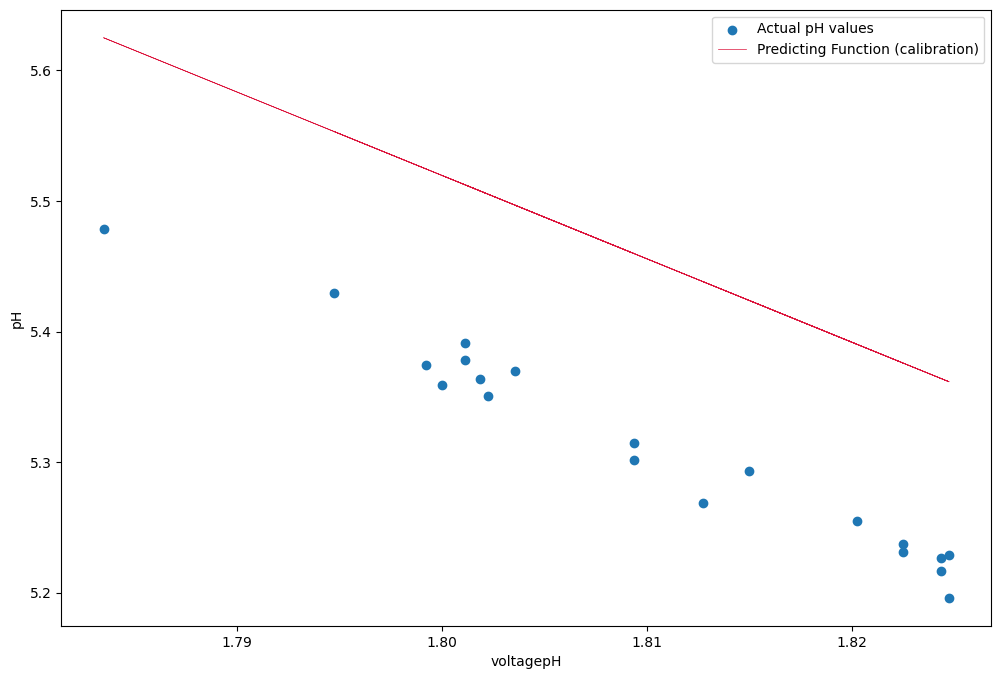

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('data.csv', sep=';')
print(df.shape)

# Computed pH values from the sensor
y_computed = df['pH'].to_numpy()  # measured and fitted values

# Raw (unfitted), voltage multiplied values from the sensor
voltagePh = df['voltagePh'].to_numpy()  # measured and unfitted values

# Predicted pH values using the equation
y_predicted = -6.387493077579728 * voltagePh + 17.017122143983634

# Compute mean of actual values
y_mean = np.mean(y_computed)

# Compute R^2
ss_total = np.sum((y_computed - y_mean) ** 2)
ss_residual = np.sum((y_computed - y_predicted) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Compute RMSE
mse = ((y_computed - y_predicted) ** 2).mean()
rmse = np.sqrt(mse)

print("PH R^2:", r_squared)
print("PH RMSE:", rmse)
print("PH Standard Deviation:", np.std(y_computed))
print("PH Variance:", np.var(y_computed))

# Let's plot the pH dataset
plt.figure(figsize=(12, 8))
plt.scatter(voltagePh, y_computed, label='Actual pH values')
# plt.scatter(voltagePh, y_predicted, label='Predicted pH values')
plt.plot(voltagePh, y_predicted, color='crimson', label='Predicting Function (calibration)', linewidth=0.5)
plt.xlabel('voltagepH')
plt.ylabel('pH')
plt.legend()
plt.show()




### Analysis using the data from the SD Card

(899, 6)
PH R²: -7.8916
PH RMSE: 0.1293
PH Std Dev: 0.0434
PH Variance: 0.0019


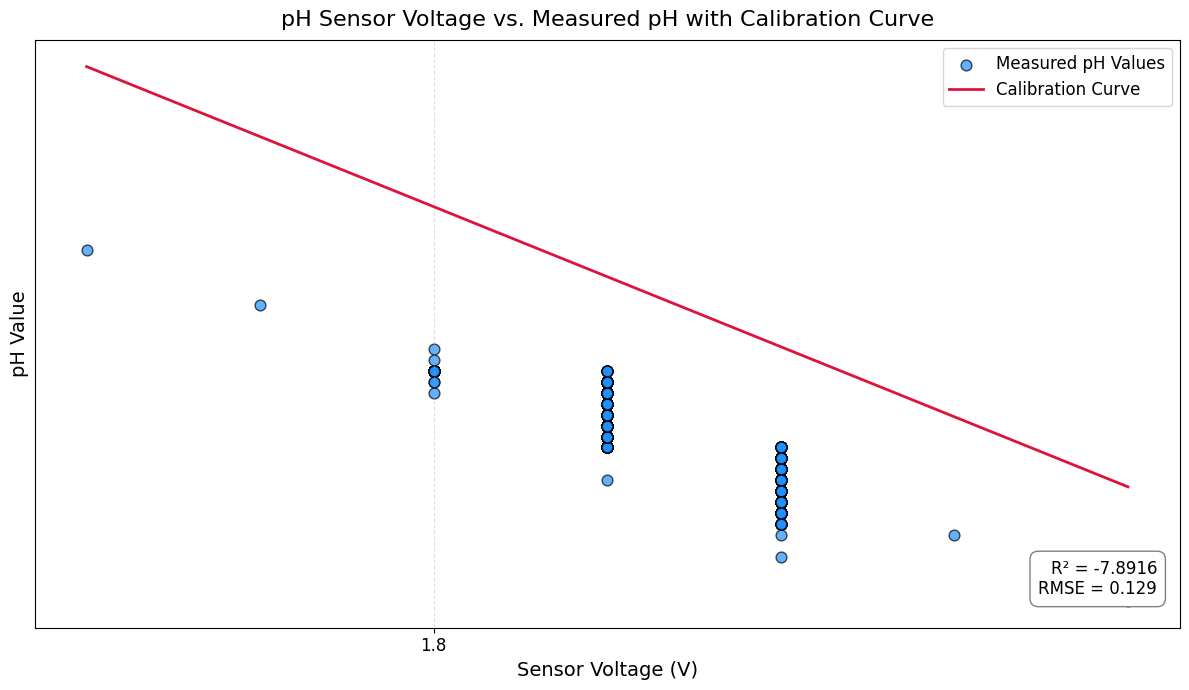

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Load dataset
df = pd.read_csv('sd_data.csv', sep=';')
df = df[df['finalpH'] > 2.4]
print(df.shape)

# Extract relevant values
y_computed = df['finalpH'].to_numpy()
voltagePh = df['voltagePh'].to_numpy()

# Predicted values from calibration function
y_predicted = -6.387493077579728 * voltagePh + 17.017122143983634

# Calculate metrics
y_mean = np.mean(y_computed)
ss_total = np.sum((y_computed - y_mean) ** 2)
ss_residual = np.sum((y_computed - y_predicted) ** 2)
r_squared = 1 - (ss_residual / ss_total)
rmse = np.sqrt(((y_computed - y_predicted) ** 2).mean())

print(f"PH R²: {r_squared:.4f}")
print(f"PH RMSE: {rmse:.4f}")
print(f"PH Std Dev: {np.std(y_computed):.4f}")
print(f"PH Variance: {np.var(y_computed):.4f}")

# Sort voltage for clean line plotting
sorted_indices = np.argsort(voltagePh)
voltage_sorted = voltagePh[sorted_indices]
y_pred_sorted = y_predicted[sorted_indices]

# Beautified Plot
plt.figure(figsize=(12, 7))
plt.grid(True, linestyle='--', alpha=0.4)

# Data points
plt.scatter(voltagePh, y_computed, 
            label='Measured pH Values', 
            color='dodgerblue', 
            edgecolor='black', 
            s=60, 
            alpha=0.7)

# Calibration curve
plt.plot(voltage_sorted, y_pred_sorted, 
         label='Calibration Curve', 
         color='crimson', 
         linewidth=2)

# Labels and Title
plt.xlabel('Sensor Voltage (V)', fontsize=14)
plt.ylabel('pH Value', fontsize=14)
plt.title('pH Sensor Voltage vs. Measured pH with Calibration Curve', fontsize=16, pad=10)

# Annotations
plt.text(0.98, 0.05, f'R² = {r_squared:.4f}\nRMSE = {rmse:.3f}', 
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'),
         ha='right', va='bottom')

# Axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().xaxis.set_major_locator(MultipleLocator(0.1))
plt.gca().yaxis.set_major_locator(MultipleLocator(1))

# Legend
plt.legend(fontsize=12, loc='upper right', frameon=True)

# Tighter layout
plt.tight_layout()

# Show
plt.show()


Error in production code regarding the intercept:


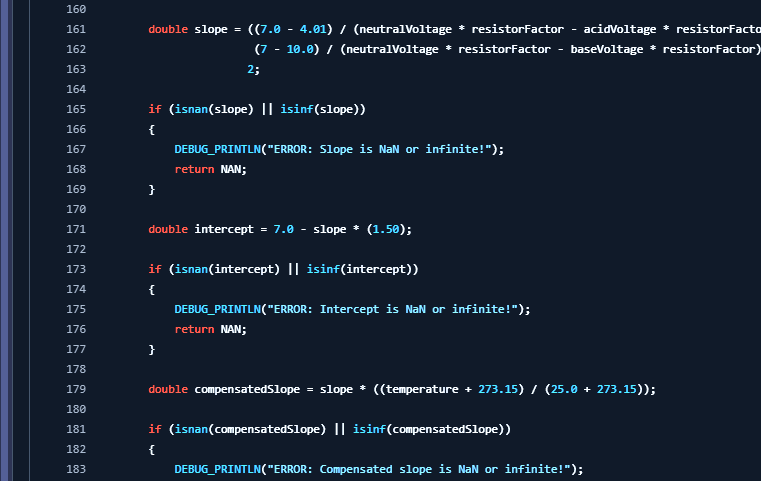


It should be this (as stated earlier in this sheet). It was an inserted mistake and wasn't corrected before code upload.


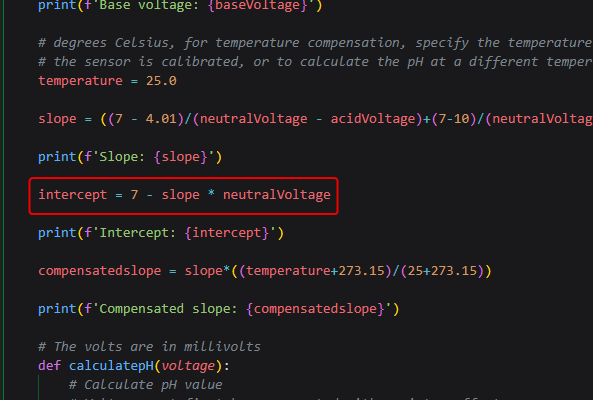

(20, 11)
TDS R^2: 0.9999999999976298
TDS RMSE: 4.592079669348576e-06
TDS Standard Deviation:  2.9827500032822063


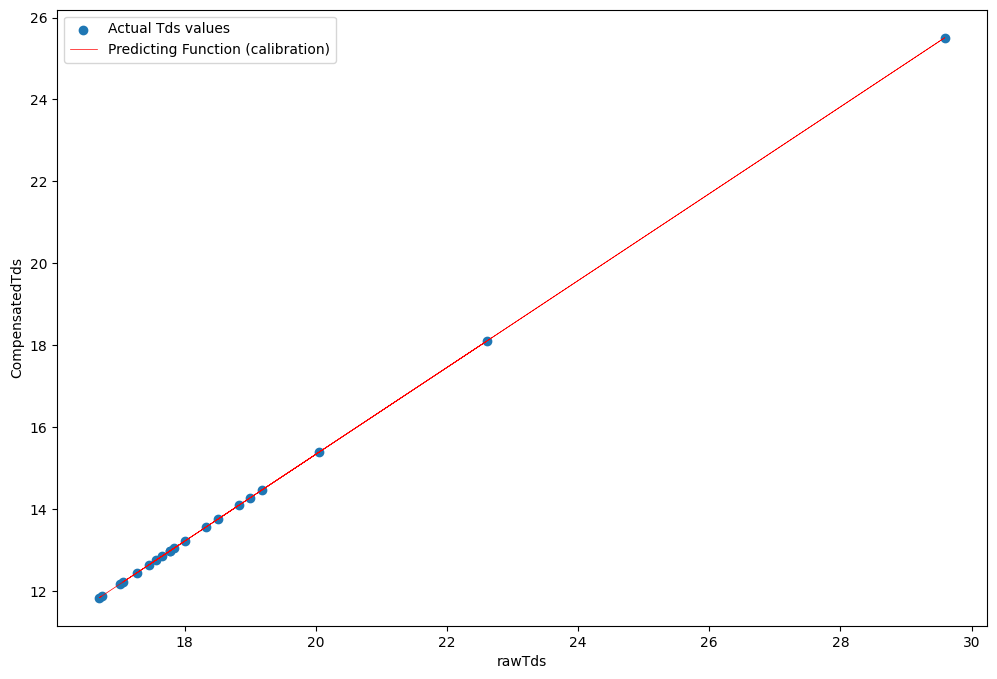

In [18]:
# Load dataset
df = pd.read_csv('data.csv', sep=';')
print(df.shape)

# Computed Tds values from the sensor
y_computed = df['TDS'].to_numpy()  # measured and fitted values

# Raw (unfitted), voltage multiplied temperature adjusted Tds values from the sensor
raw_Tds = df['rawTDS'].to_numpy()  # measured and unfitted values

# Predicted TDS values using the equation
y_predicted = 1.0598834288381727 * raw_Tds - 5.855601572307982

# Compute mean of actual values
y_mean = np.mean(y_computed)

# Compute R^2
ss_total = np.sum((y_computed - y_mean) ** 2)
ss_residual = np.sum((y_computed - y_predicted) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Compute RMSE
mse = ((y_computed - y_predicted) ** 2).mean()
rmse = np.sqrt(mse)

print("TDS R^2:", r_squared)
print("TDS RMSE:", rmse)
print("TDS Standard Deviation: ", np.std(y_computed))

# Let's plot the Tds dataset
plt.figure(figsize=(12, 8))
plt.scatter(raw_Tds, y_computed, label='Actual Tds values')
#plt.scatter(raw_Tds, y_predicted, label='Predicted Tds values')
plt.plot(raw_Tds, y_predicted, color='red', label='Predicting Function (calibration)', linewidth=0.5)
plt.xlabel('rawTds')
plt.ylabel('CompensatedTds')
plt.legend()
plt.show()